# NEURAL SPIKING AND FIRING RATE

In this simulation we are going to simulate spikes analyse the statistics of the firing rate.
In order to simulate the spikes we are going to randomly generate some numbers and determinate the spikes. Once we have all the spikes we can plot the result.

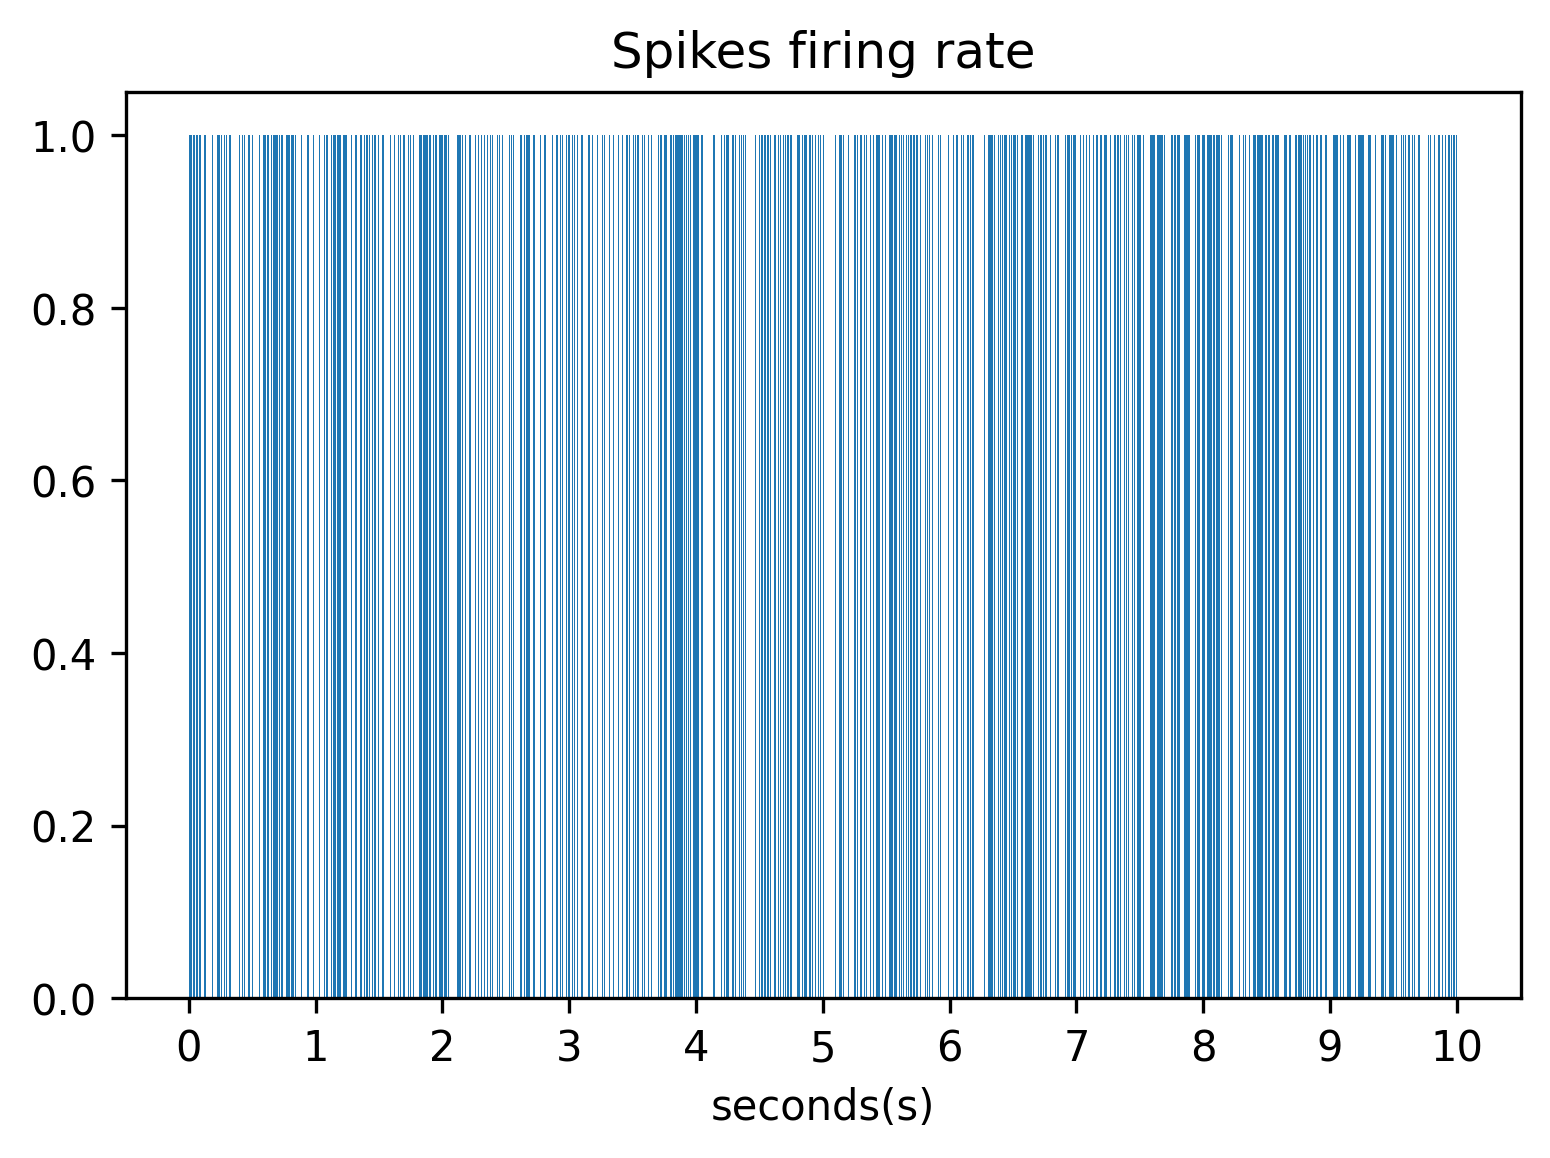

In [2]:
%matplotlib inline
import numpy as np
import statistics
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300

#Simulation parameters
dt = 0.001     # Length of time intervals
T = 10          # Total simulation time in seconds
r = 100          # Firing rate in spikes per second = freq
p = r*dt       

spikes1 = 0
# Simulate a spike train
spikes = np.random.rand(int(T/dt))
spikes[spikes < p] = 1
spikes[spikes < 1] = 0

for spike in spikes:
    if spike == 1:
        spikes1+=1
ind = np.arange(len(spikes));

#creating plot
fig, ax = plt.subplots()

#subplot 0 shows spiking frequency
ax.bar(ind, spikes, 5, align ='edge')
ax.set_title('Spikes firing rate')
ax.set_xlabel('seconds(s)')
ax.set_xticks(np.arange(stop = len(spikes) + 1/dt, step = 1/dt), np.arange(T+1));

We can now analyse the firing rate of the resulting spiking distribution. We can do this by defining some time bins and determinating how many spikes where given in that range of time.
We can then calculate the average time passed between two spikes and the standard deviation:

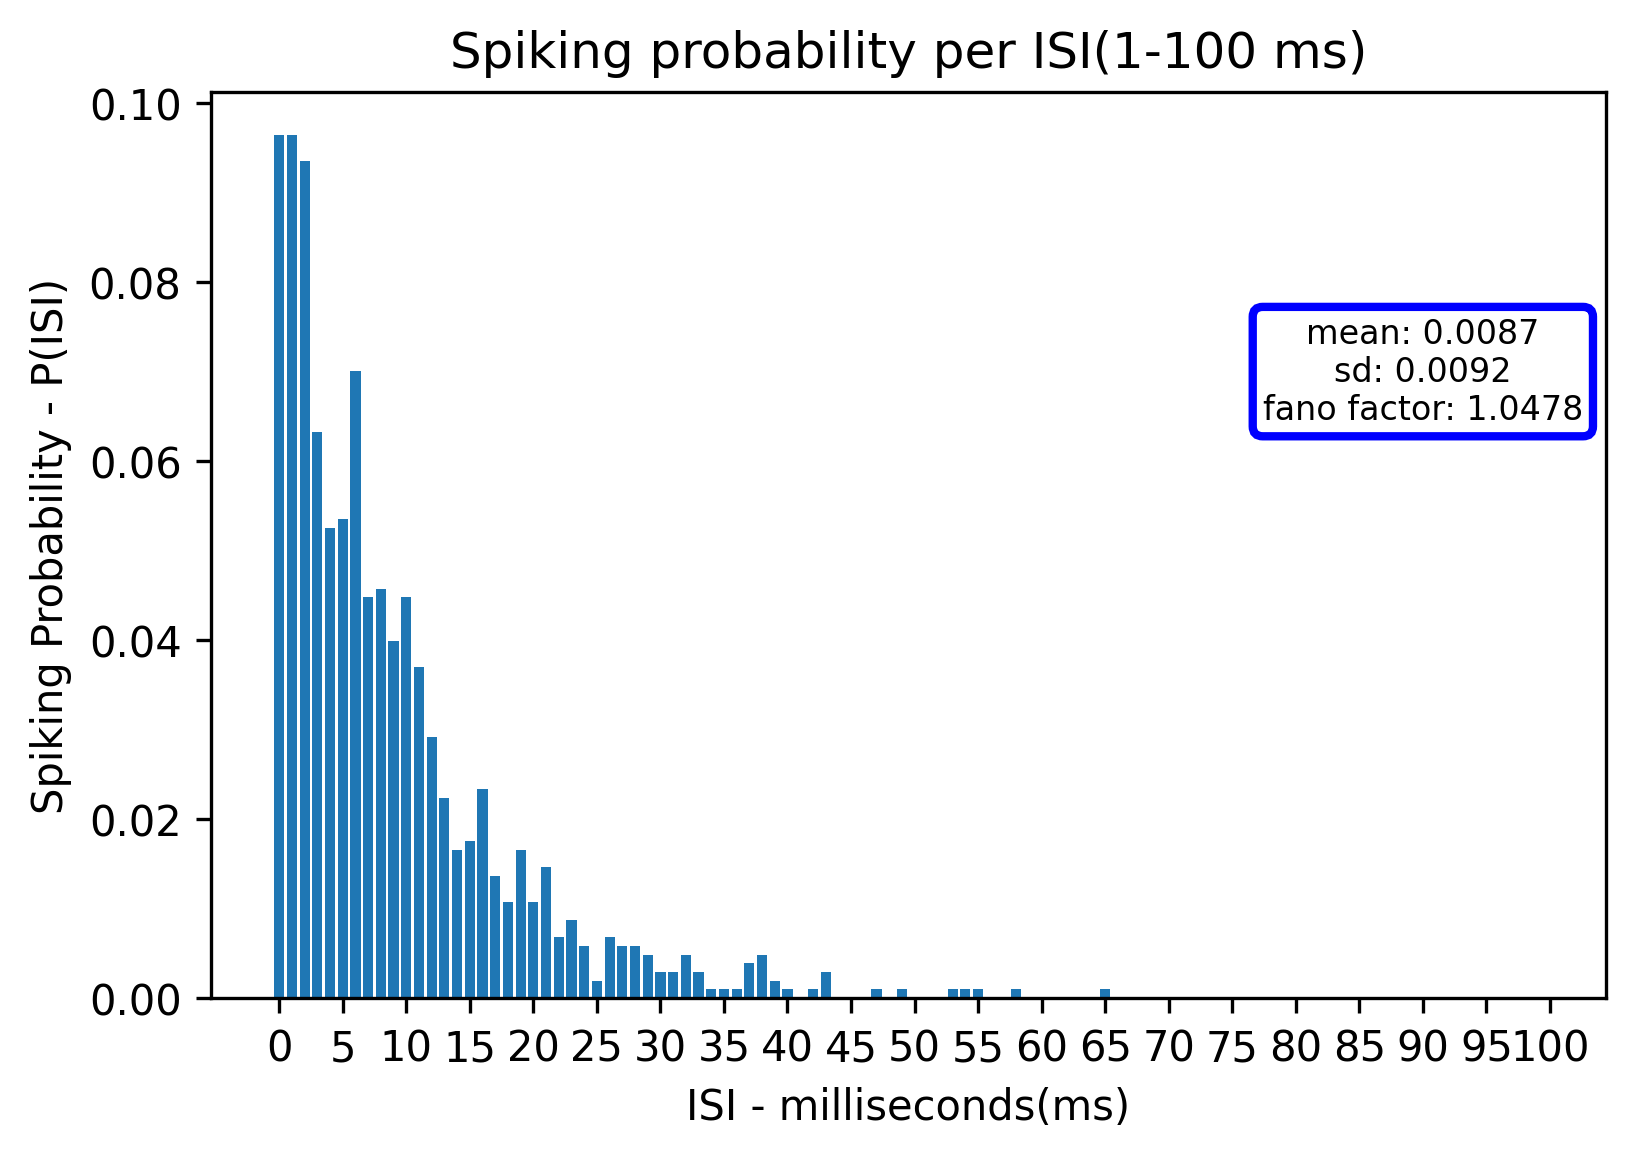

In [4]:
fig, ax = plt.subplots()
#calculating every time interval between 2 spikes(ms)
freqs = [0] * (spikes1-1)
interval = 0
counter = 0
for spike in spikes:
    if spike == 0:
        interval+=1
    elif counter != spikes1:
        if counter != 0:
            freqs[counter - 1] = interval/1000
        counter += 1
        interval = 0

#determining how many frequencies have occurred of every ISI(1-100 ms)
isi = [0]*100
for freq in freqs:
    isi[int(freq*1000)] += 1
it = 0
for smt in isi:
    isi[it] /= spikes1
    it += 1
ax.bar(np.arange(100), isi)
ind = np.arange(21);
it = 0
for smt in ind:
    ind[it] *= 5
    it+=1

#subplot 1 shows spiking probability for diferens ISI(every 1ms - 100ms)
ax.set_xticks(np.arange(stop = 105, step = 5), ind)
ax.set_title('Spiking probability per ISI(1-100 ms)')
ax.set_xlabel('ISI - milliseconds(ms)')
ax.set_ylabel('Spiking Probability - P(ISI)')

toWrite = 'mean: ' + '%.4f'%(statistics.mean(freqs)) + '\nsd: ' + '%.4f'%(statistics.stdev(freqs))
toWrite += '\nfano factor: ' + '%.4f'%((statistics.stdev(freqs)) / (statistics.mean(freqs)))
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2)
t = ax.text(90, 0.07, toWrite, ha="center", va="center",
            size=8,
            bbox=bbox_props)


